# Hypothesis Testing Method
***by: Nirav Naik***

***version 1.0: 10/11/2022***

In [1]:
#importing library
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sta
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")

### 1. Compariosn of two dataset using distplot graph.

In [4]:
ger_sales = np.load("/home/dai/Desktop/dai2022/modulewise/DataAnalytics/tusharchaudhari/germany_sales.npy")
fr_sales = np.load("/home/dai/Desktop/dai2022/modulewise/DataAnalytics/tusharchaudhari/france_sales.npy")

In [5]:
len(ger_sales), len(fr_sales)

(65, 27)

In [6]:
# function to print graph and mean value line.
def plot_distribution(inpt, title):
  plt.figure()
  ax = sns.distplot(inpt)
  plt.axvline(np.mean(inpt), color='k', linestyle='dashed', linewidth=5)
  _, max_ = plt.ylim()
  plt.text(
    inpt.mean() + inpt.mean()/10,
    max_ - max_/10,
    "mean : {:.2f}".format(inpt.mean())
  )
  plt.title(title)

  return plt.figure,plt.ylim()

(<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>,
 (0.0, 0.0003341173215273935))

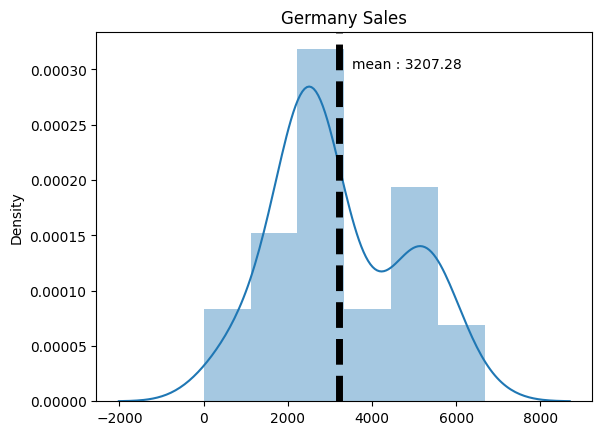

In [7]:
plot_distribution(ger_sales, "Germany Sales")

(<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>,
 (0.0, 0.0007237386269644334))

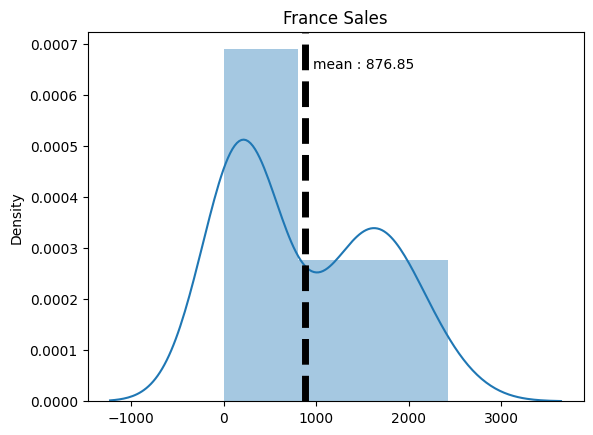

In [8]:
plot_distribution(fr_sales, "France Sales")

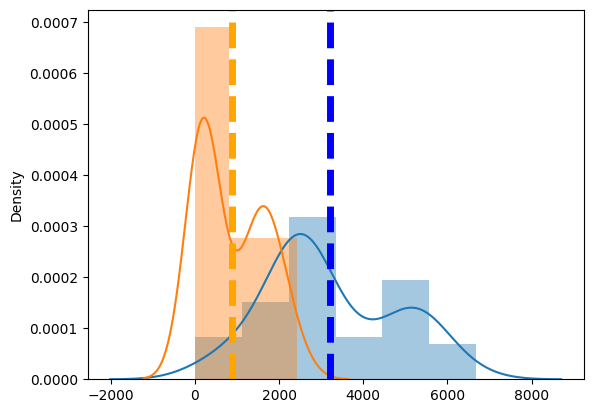

In [9]:
#Comparing two dataset to check its similarity in distribution.
plt.figure()
sns.distplot(ger_sales)
sns.distplot(fr_sales)
plt.axvline(np.mean(ger_sales), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(fr_sales), color='orange', linestyle='dashed', linewidth=5)

### 2. Comparing two variable datasets using T-Test and Hypothesis Testing.

In [10]:
sta.ttest_ind(ger_sales, fr_sales)

Ttest_indResult(statistic=7.401250878526029, pvalue=6.861882182135869e-11)

In [88]:
#functin will compare two dataset and retun result of hypothesis testing.
def compare_2_groups(arr_1, arr_2, alpha=0.05):
  stat, p_value = sta.ttest_ind(arr_1, arr_2)

  if p_value>alpha:
    print("Same distribution ( Fail to reject H0 )")
  else:
    print("Different distribution (reject H0 )")

In [12]:
compare_2_groups(ger_sales, fr_sales)

Different distribution (reject H0 )


### 2.1 T-Test and Hypothesis Testing using user generated datasets.

In [89]:
#Creating two datasets.
cdac_ages_1 = [25, 30, 28, 35, 46, 23, 43, 22, 20, 30, 33, 32, 44, 32,24 ]
len(cdac_ages_1)

15

In [14]:
cdac_ages_2 = cdac_ages_1 + sta.norm.rvs(scale=500, loc=5.25, size=15)

In [15]:
cdac_ages_1, cdac_ages_2

([25, 30, 28, 35, 46, 23, 43, 22, 20, 30, 33, 32, 44, 32, 24],
 array([ 121.0573087 ,  -79.82668242, -561.54390349, -153.81308782,
         352.20583724, -533.25150041, -802.56044825, -288.15910192,
        -249.38268638,  204.28117649, -972.69070084, -835.54072006,
        -131.03571834, -174.67227296, -266.49650636]))

In [16]:
compare_2_groups(cdac_ages_1, cdac_ages_2)

Different distribution (reject H0 )


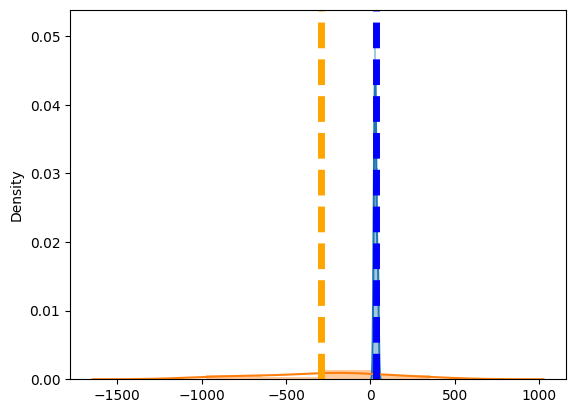

In [17]:
plt.figure()
sns.distplot(cdac_ages_1)
sns.distplot(cdac_ages_2)
plt.axvline(np.mean(cdac_ages_1), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(cdac_ages_2), color='orange', linestyle='dashed', linewidth=5)

In [18]:
sta.ttest_ind(cdac_ages_1, cdac_ages_2)

Ttest_indResult(statistic=3.2337882630569714, pvalue=0.003125616484475932)

In [19]:
import random

In [20]:
ages=[random.randint(10,60) for i in range(100)]

In [21]:
np.mean(ages)

34.81

In [22]:
ages_sample=np.random.choice(ages,15)

In [23]:
ttest_stat,p_value=sta.ttest_1samp(ages_sample,15)

In [24]:
ttest_stat,p_value

(4.068139457982469, 0.0011516514824214167)

In [25]:
cdac_student=sta.norm.rvs(
loc=25,
scale=5,
size=800)

In [26]:
cdac_sample=np.random.choice(cdac_student,37)
mean1=cdac_sample.mean()

In [27]:
ttest_stat,p_value=sta.ttest_1samp(cdac_sample,25)

In [28]:
ttest_stat,p_value

(0.5386760446206877, 0.5934260101215267)

<AxesSubplot: ylabel='Density'>

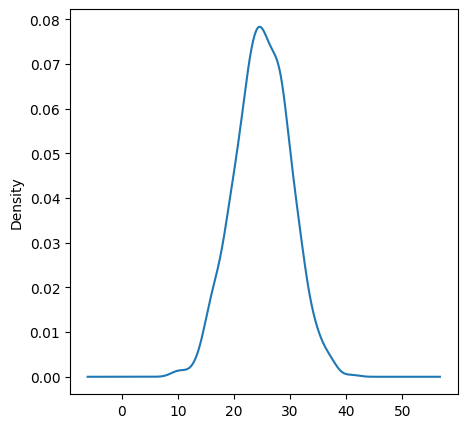

In [29]:
pd.Series(cdac_student).plot(kind='density', figsize=(5,5))

In [30]:
pd.Series(cdac_student).describe()

count    800.000000
mean      25.026317
std        4.885704
min        9.613250
25%       21.795424
50%       24.986560
75%       28.398618
max       41.001756
dtype: float64

### 3. Comparing two Categorical Columns using Chi-Square-Test and Hypothesis Testing.

In [31]:
dataset1=sns.load_dataset("tips")

In [32]:
dataset1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [91]:
#Creating Chi square matrix using cross tab.
#observed_value
observed_value_table=pd.crosstab(dataset1['sex'],dataset1['smoker'])

In [34]:
observed_value=observed_value_table.values

In [35]:
observed_value

array([[60, 97],
       [33, 54]])

In [92]:
#observed_value
expected_value = sta.chi2_contingency(observed_value_table)[3]
expected_value

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [93]:
#Formula for Chi square.
[((o-e)**2)/e for o,e in zip(observed_value,expected_value)]

[array([0.00042693, 0.00026294]), array([0.00077044, 0.00047451])]

In [38]:
chi_2_stat=np.sum(sum([((o-e)**2)/e for o,e in zip(observed_value,expected_value)]))

In [39]:
chi_2_stat

0.001934818536627623

In [40]:
1-sta.chi2.cdf(chi_2_stat,df=1)

0.964915107315732

### 3. Comparing variable and categorical Columns using ANOVA-Test and Hypothesis Testing.

In [41]:
irisdf=sns.load_dataset('iris')

In [42]:
irisdf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [43]:
irisdf['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [44]:
petaldict=dict()
for spc, splln in zip(irisdf['species'],irisdf['petal_length']):
    if spc not in petaldict.keys():
        petaldict[spc]=list()
        petaldict[spc].append(splln)
    else:
        petaldict[spc].append(splln)

In [45]:
petaldf=pd.DataFrame(petaldict)

In [46]:
petaldf

,setosa,versicolor,virginica
0,1.4,4.7,6.0
1,1.4,4.5,5.1
2,1.3,4.9,5.9
3,1.5,4.0,5.6
4,1.4,4.6,5.8
5,1.7,4.5,6.6
6,1.4,4.7,4.5
7,1.5,3.3,6.3
8,1.4,4.6,5.8
9,1.5,3.9,6.1


In [47]:
lst=irisdf['species'].unique()
lst

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [48]:
irisdf.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [49]:
df_anova = irisdf[['species','petal_length']]

In [50]:
lst

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
result = pd.DataFrame({species: list(df_anova[df_anova['species']==species]['petal_length']) for species in lst})

In [52]:
result

,setosa,versicolor,virginica
0,1.4,4.7,6.0
1,1.4,4.5,5.1
2,1.3,4.9,5.9
3,1.5,4.0,5.6
4,1.4,4.6,5.8
5,1.7,4.5,6.6
6,1.4,4.7,4.5
7,1.5,3.3,6.3
8,1.4,4.6,5.8
9,1.5,3.9,6.1


In [53]:
result.columns

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [54]:
sta.f_oneway(result['setosa'], result['versicolor'],result['virginica'])

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)

In [55]:
df_anova = irisdf[['species','petal_width']]

In [56]:
df_anova

,species,petal_width
0,setosa,0.2
1,setosa,0.2
2,setosa,0.2
3,setosa,0.2
4,setosa,0.2
...,...,...
145,virginica,2.3
146,virginica,1.9
147,virginica,2.0
148,virginica,2.3


In [57]:
lst

array(['setosa', 'versicolor', 'virginica'], dtype=object)

**note:** this function **anovadataframe** will convert category column values to category and compare with its one descrete variable

In [58]:
def anovadataframe(dfname,catlist,columnname,cat_col):
    data = pd.DataFrame({i: list(dfname[dfname[cat_col]==i][columnname]) for i in catlist})
    col = data.columns
#     print(data[col[0]])
#     print(col[0])
    return sta.f_oneway(data[col[0]],data[col[1]],data[col[2]])

In [59]:
anovadataframe(dfname = df_anova,catlist = list(lst),columnname = 'petal_width', cat_col = 'species')

F_onewayResult(statistic=960.007146801809, pvalue=4.169445839443116e-85)

In [60]:
irisdf.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [61]:
anovadataframe(dfname=irisdf,catlist=lst,columnname='sepal_length',cat_col='species')

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [62]:
irisdf.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [63]:
for i in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    temp=anovadataframe(dfname=irisdf,catlist=lst,columnname=i,cat_col='species')
    print(temp)

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)
F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)
F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)
F_onewayResult(statistic=960.007146801809, pvalue=4.169445839443116e-85)


In [64]:
irisdf.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [65]:
irisdf['sepalsum']=irisdf['sepal_length']+irisdf['sepal_width']
irisdf['petalsum']=irisdf['petal_length']+irisdf['petal_width']
irisdf['sepaldot']=irisdf['sepal_length']*irisdf['sepal_width']
irisdf['petaldot']=irisdf['petal_length']*irisdf['petal_width']
irisdf['sepalpetalln']=irisdf['petal_length']+irisdf['sepal_length']
irisdf['sepalpetallndot']=irisdf['petal_length']*irisdf['sepal_length']

irisdf['sepalpetalw']=irisdf['sepal_width']*irisdf['petal_width']
irisdf['sepalpetalwdot']=irisdf['sepal_width']*irisdf['petal_width']

irisdf['allsum']=irisdf['sepal_length']+irisdf['sepal_width']+irisdf['petal_length']+irisdf['petal_width']
irisdf['alldot']=irisdf['sepal_length']*irisdf['sepal_width']*irisdf['petal_length']*irisdf['petal_width']

In [66]:
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepalsum,petalsum,sepaldot,petaldot,sepalpetalln,sepalpetallndot,sepalpetalw,sepalpetalwdot,allsum,alldot
0,5.1,3.5,1.4,0.2,setosa,8.6,1.6,17.85,0.28,6.5,7.14,0.70,0.70,10.2,4.9980
1,4.9,3.0,1.4,0.2,setosa,7.9,1.6,14.70,0.28,6.3,6.86,0.60,0.60,9.5,4.1160
2,4.7,3.2,1.3,0.2,setosa,7.9,1.5,15.04,0.26,6.0,6.11,0.64,0.64,9.4,3.9104
3,4.6,3.1,1.5,0.2,setosa,7.7,1.7,14.26,0.30,6.1,6.90,0.62,0.62,9.4,4.2780
4,5.0,3.6,1.4,0.2,setosa,8.6,1.6,18.00,0.28,6.4,7.00,0.72,0.72,10.2,5.0400


In [67]:
irisdf.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepalsum', 'petalsum', 'sepaldot', 'petaldot', 'sepalpetalln',
       'sepalpetallndot', 'sepalpetalw', 'sepalpetalwdot', 'allsum', 'alldot'],
      dtype='object')

In [68]:
for i in ['sepalsum', 'petalsum','sepaldot', 'petaldot','allsum','alldot','sepalpetalln','sepalpetallndot','sepalpetalw', 'sepalpetalwdot']:
    temp=anovadataframe(dfname=irisdf,catlist=lst,columnname=i,cat_col='species')
    print(f'{i}--->',temp)

sepalsum---> F_onewayResult(statistic=30.619830676787906, pvalue=7.645583125080335e-12)
petalsum---> F_onewayResult(statistic=1426.1589842082856, pvalue=5.453429080387334e-97)
sepaldot---> F_onewayResult(statistic=14.2415146151351, pvalue=2.2209694564641505e-06)
petaldot---> F_onewayResult(statistic=683.1085727470041, pvalue=3.759083543153998e-75)
allsum---> F_onewayResult(statistic=422.3896108837833, pvalue=1.1516518471957811e-61)
alldot---> F_onewayResult(statistic=263.09002598714716, pvalue=2.6926387563102663e-49)
sepalpetalln---> F_onewayResult(statistic=529.0281595453438, pvalue=6.9788568325878695e-68)
sepalpetallndot---> F_onewayResult(statistic=461.1839088387493, pvalue=4.5392230066281325e-64)
sepalpetalw---> F_onewayResult(statistic=395.0967365922796, pvalue=7.385396749355266e-60)
sepalpetalwdot---> F_onewayResult(statistic=395.0967365922796, pvalue=7.385396749355266e-60)


In [69]:
irisdf.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepalsum,petalsum,sepaldot,petaldot,sepalpetalln,sepalpetallndot,sepalpetalw,sepalpetalwdot,allsum,alldot
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,8.900667,4.957333,17.822867,5.794067,9.601333,23.225067,3.545933,3.545933,13.858000,110.419283
std,0.828066,0.435866,1.765298,0.762238,0.889272,2.507689,3.361854,4.712390,2.520040,13.140241,2.332016,2.332016,3.123762,102.925486
min,4.300000,2.000000,1.000000,0.100000,6.800000,1.200000,10.000000,0.110000,5.400000,4.600000,0.300000,0.300000,8.400000,1.419000
25%,5.100000,2.800000,1.600000,0.300000,8.300000,1.800000,15.660000,0.420000,6.725000,8.000000,1.050000,1.050000,10.700000,6.993000
50%,5.800000,3.000000,4.350000,1.300000,8.850000,5.650000,17.660000,5.615000,10.100000,24.590000,3.695000,3.695000,14.300000,92.718000
75%,6.400000,3.300000,5.100000,1.800000,9.575000,7.000000,20.325000,9.690000,11.600000,33.087500,5.265000,5.265000,16.250000,162.963900
max,7.900000,4.400000,6.900000,2.500000,11.700000,9.200000,30.020000,15.870000,14.600000,53.130000,9.000000,9.000000,20.400000,431.292400


**note:** this function **zscore** will convert for normalization in columns

In [70]:
def z_score(x, mean, std):
    return (x-mean)/std

In [71]:
def z_score_col(dataframe,ocol,ncol):
    mean_=dataframe[ocol].mean()
    std_=dataframe[ocol].std()
    dataframe[ncol]=dataframe[ocol].apply(lambda x: z_score(x,mean_,std_))

In [72]:
irisdf.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepalsum', 'petalsum', 'sepaldot', 'petaldot', 'sepalpetalln',
       'sepalpetallndot', 'sepalpetalw', 'sepalpetalwdot', 'allsum', 'alldot'],
      dtype='object')

In [73]:
z_score_col(irisdf,'sepal_length','sepal_ln_n')

In [74]:
irisdf1=irisdf[['sepal_length','sepal_width','petal_length','petal_width','species']]

In [75]:
z_score_col(irisdf1,'sepal_length','sepal_ln_n')
z_score_col(irisdf1,'sepal_width','sepal_w_n')
z_score_col(irisdf1,'petal_length','petal_ln_n')
z_score_col(irisdf1,'petal_width','petal_w_n')

In [76]:
irisdf1

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ln_n,sepal_w_n,petal_ln_n,petal_w_n
0,5.1,3.5,1.4,0.2,setosa,-0.897674,1.015602,-1.335752,-1.311052
1,4.9,3.0,1.4,0.2,setosa,-1.139200,-0.131539,-1.335752,-1.311052
2,4.7,3.2,1.3,0.2,setosa,-1.380727,0.327318,-1.392399,-1.311052
3,4.6,3.1,1.5,0.2,setosa,-1.501490,0.097889,-1.279104,-1.311052
4,5.0,3.6,1.4,0.2,setosa,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.034539,-0.131539,0.816859,1.443994
146,6.3,2.5,5.0,1.9,virginica,0.551486,-1.278680,0.703564,0.919223
147,6.5,3.0,5.2,2.0,virginica,0.793012,-0.131539,0.816859,1.050416
148,6.2,3.4,5.4,2.3,virginica,0.430722,0.786174,0.930154,1.443994


In [77]:
irisdf1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_ln_n', 'sepal_w_n', 'petal_ln_n', 'petal_w_n'],
      dtype='object')

In [78]:
for i in ['sepal_ln_n', 'sepal_w_n', 'petal_ln_n', 'petal_w_n']:
    temp=anovadataframe(dfname=irisdf1,catlist=lst,columnname=i,cat_col='species')
    print(f'{i}--->',temp)

sepal_ln_n---> F_onewayResult(statistic=119.26450218450461, pvalue=1.6696691907694362e-31)
sepal_w_n---> F_onewayResult(statistic=49.16004008961207, pvalue=4.492017133309115e-17)
petal_ln_n---> F_onewayResult(statistic=1180.1611822529792, pvalue=2.856776610961857e-91)
petal_w_n---> F_onewayResult(statistic=960.0071468018067, pvalue=4.169445839443833e-85)


In [79]:
irisdf1.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_ln_n,sepal_w_n,petal_ln_n,petal_w_n
count,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,5.843333,3.057333,3.758000,1.199333,-5.684342e-16,-7.815970e-16,-2.842171e-16,-3.789561e-16
std,0.828066,0.435866,1.765298,0.762238,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,4.300000,2.000000,1.000000,0.100000,-1.863780e+00,-2.425820e+00,-1.562342e+00,-1.442245e+00
25%,5.100000,2.800000,1.600000,0.300000,-8.976739e-01,-5.903951e-01,-1.222456e+00,-1.179859e+00
50%,5.800000,3.000000,4.350000,1.300000,-5.233076e-02,-1.315388e-01,3.353541e-01,1.320673e-01
75%,6.400000,3.300000,5.100000,1.800000,6.722490e-01,5.567457e-01,7.602115e-01,7.880307e-01
max,7.900000,4.400000,6.900000,2.500000,2.483699e+00,3.080455e+00,1.779869e+00,1.706379e+00


**note:** this function min max will convert scale to 0-1

In [80]:
def minmaxscale(x,min_,max_):
    temp=(x-min_)/(max_-min_)
    return temp

In [81]:
def minmaxscale_col(dataframe,ocol,ncol):
    min_=dataframe[ocol].min()
    max_=dataframe[ocol].max()
    dataframe[ncol]=dataframe[ocol].apply(lambda x: minmaxscale(x,min_,max_))

In [94]:
minmaxscale_col(irisdf1,'sepal_length','sepal_ln_s')
minmaxscale_col(irisdf1,'sepal_width','sepal_w_s')
minmaxscale_col(irisdf1,'petal_length','petal_ln_s')
minmaxscale_col(irisdf1,'petal_width','petal_w_s')

In [95]:
irisdf1

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ln_n,sepal_w_n,petal_ln_n,petal_w_n,sepal_ln_s,...,petal_ln_s,petal_w_s,sepalsum_s,petalsum_s,sepaldot_s,petaldot_s,allsum_s,alldot_s,sepal_ln_w_s,petal_ln_w_s
0,5.1,3.5,1.4,0.2,setosa,-0.897674,1.015602,-1.335752,-1.311052,0.222222,...,0.067797,0.041667,0.847222,0.109463,0.138889,0.002825,0.956685,0.000392,0.355556,1.627119
1,4.9,3.0,1.4,0.2,setosa,-1.139200,-0.131539,-1.335752,-1.311052,0.166667,...,0.067797,0.041667,0.583333,0.109463,0.069444,0.002825,0.692797,0.000196,0.400000,1.627119
2,4.7,3.2,1.3,0.2,setosa,-1.380727,0.327318,-1.392399,-1.311052,0.111111,...,0.050847,0.041667,0.611111,0.092514,0.055556,0.002119,0.703625,0.000118,0.222222,1.220339
3,4.6,3.1,1.5,0.2,setosa,-1.501490,0.097889,-1.279104,-1.311052,0.083333,...,0.084746,0.041667,0.541667,0.126412,0.038194,0.003531,0.668079,0.000135,0.181818,2.033898
4,5.0,3.6,1.4,0.2,setosa,-1.018437,1.245030,-1.335752,-1.311052,0.194444,...,0.067797,0.041667,0.861111,0.109463,0.129630,0.002825,0.970574,0.000366,0.291667,1.627119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.034539,-0.131539,0.816859,1.443994,0.666667,...,0.711864,0.916667,1.083333,1.628531,0.277778,0.652542,2.711864,0.181262,1.600000,0.776579
146,6.3,2.5,5.0,1.9,virginica,0.551486,-1.278680,0.703564,0.919223,0.555556,...,0.677966,0.750000,0.763889,1.427966,0.115741,0.508475,2.191855,0.058851,2.666667,0.903955
147,6.5,3.0,5.2,2.0,virginica,0.793012,-0.131539,0.816859,1.050416,0.611111,...,0.711864,0.791667,1.027778,1.503531,0.254630,0.563559,2.531309,0.143499,1.466667,0.899197
148,6.2,3.4,5.4,2.3,virginica,0.430722,0.786174,0.930154,1.443994,0.527778,...,0.745763,0.916667,1.111111,1.662429,0.307870,0.683616,2.773540,0.210465,0.904762,0.813559


In [84]:
irisdf1['sepalsum_s']=irisdf1['sepal_ln_s']+irisdf1['sepal_w_s']
irisdf1['petalsum_s']=irisdf1['petal_ln_s']+irisdf1['petal_w_s']
irisdf1['sepaldot_s']=irisdf1['sepal_ln_s']*irisdf1['sepal_w_s']
irisdf1['petaldot_s']=irisdf1['petal_ln_s']*irisdf1['petal_w_s']
irisdf1['allsum_s']=irisdf1['sepal_ln_s']+irisdf1['sepal_w_s']+irisdf1['petal_ln_s']+irisdf1['petal_w_s']
irisdf1['alldot_s']=irisdf1['sepal_ln_s']*irisdf1['sepal_w_s']*irisdf1['petal_ln_s']*irisdf1['petal_w_s']
irisdf1['sepal_ln_w_s']=irisdf1['sepal_ln_s']/irisdf1['sepal_w_s']
irisdf1['petal_ln_w_s']=irisdf1['petal_ln_s']/irisdf1['petal_w_s']

In [85]:
irisdf1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_ln_n', 'sepal_w_n', 'petal_ln_n', 'petal_w_n', 'sepal_ln_s',
       'sepal_w_s', 'petal_ln_s', 'petal_w_s', 'sepalsum_s', 'petalsum_s',
       'sepaldot_s', 'petaldot_s', 'allsum_s', 'alldot_s', 'sepal_ln_w_s',
       'petal_ln_w_s'],
      dtype='object')

In [86]:
for i in ['allsum_s','alldot_s','sepal_ln_w_s','petal_ln_w_s']:
    temp=anovadataframe(dfname=irisdf1,catlist=lst,columnname=i,cat_col='species')
    print(f'{i}--->',temp)

allsum_s---> F_onewayResult(statistic=285.96409034555865, pvalue=2.1450592973751445e-51)
alldot_s---> F_onewayResult(statistic=80.1287703150022, pvalue=2.926757076941354e-24)
sepal_ln_w_s---> F_onewayResult(statistic=nan, pvalue=nan)
petal_ln_w_s---> F_onewayResult(statistic=nan, pvalue=nan)


#### Note: With the help of ANOVA Test, In iris dataset there is no relationship between any numerical and categorial columns.